In [1]:
from alphazero.scripts.compute_benchmark_rating import *

In [2]:
np.set_printoptions(edgeitems=50, linewidth=300)

In [3]:
game = 'c4'
tag = 'benchmark'
n_games = 1
committee = BenchmarkCommittee(game, tag, load_past_data=True)
committee.compute_ratings()

In [4]:
i0_agents = [agent for agent in  committee.G.nodes if isinstance(agent, MCTSAgent) and agent.n_iters == 0]
i100_agents = [agent for agent in  committee.G.nodes if isinstance(agent, MCTSAgent) and agent.n_iters == 100]
perfect_agents = [agent for agent in  committee.G.nodes if isinstance(agent, PerfectAgent)]

In [5]:
sub_committee1 = committee.sub_committee(include_agents=[RandomAgent()] + i0_agents)
sub_committee2 = committee.sub_committee(include_agents=[RandomAgent()] + i100_agents)
sub_committee3 = committee.sub_committee(include_agents=[RandomAgent()] + i0_agents + perfect_agents)
sub_committee4 = committee.sub_committee(include_agents=[RandomAgent()] + i100_agents + perfect_agents)
sub_committee = [sub_committee1, sub_committee2, sub_committee3, sub_committee4]
[s.compute_ratings() for s in sub_committee]

[None, None, None, None]

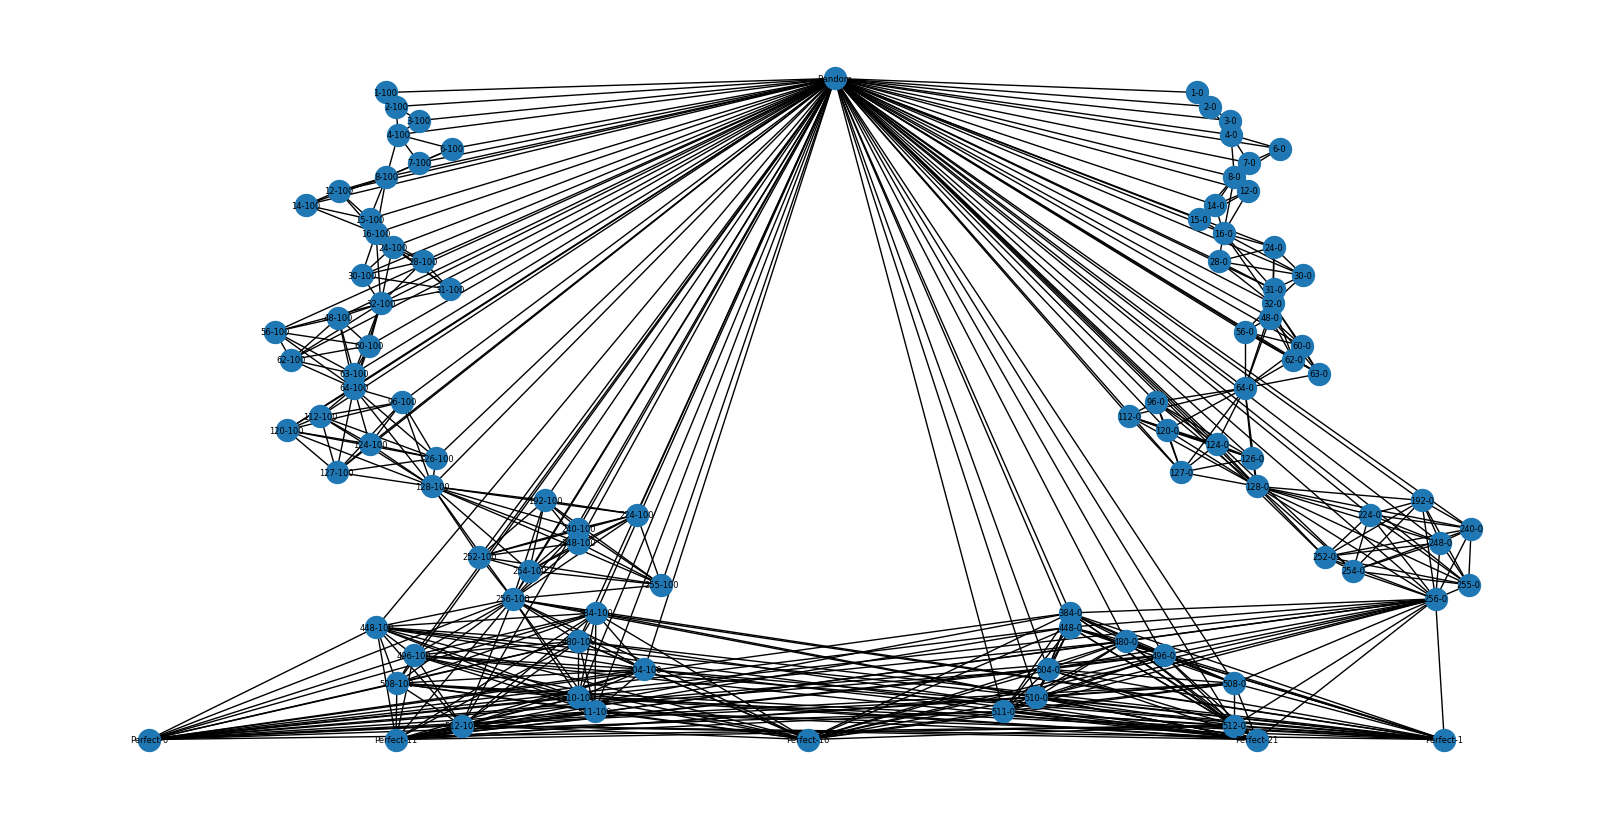

In [6]:
pos = graphviz_layout(committee.G, prog="dot")
labels = {node: str(node) for node in committee.G.nodes}
plt.figure(figsize=(16,8))
nx.draw(committee.G, pos, with_labels=True, node_size=250, font_size=6)

Text(0.5, 1.0, 'W/O Perfect Agents')

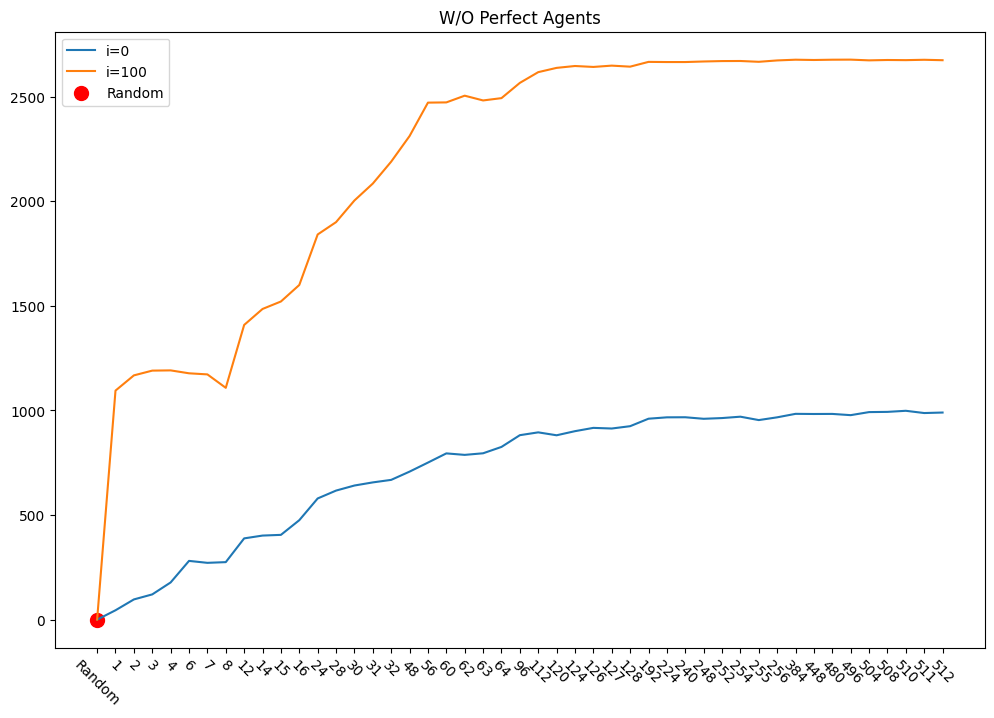

In [39]:
plt.figure(figsize=(12, 8))
labels1 = [agent.gen if isinstance(agent, MCTSAgent) else str(agent) for agent, rating in sub_committee1.ratings.items()]
labels2 = [agent.gen if isinstance(agent, MCTSAgent) else str(agent) for agent, rating in sub_committee2.ratings.items()]
plt.xticks(rotation=-45)
plt.plot(labels1, sub_committee1.ratings.values(), label='i=0')
plt.plot(labels2, sub_committee2.ratings.values(), label='i=100')
plt.scatter(0, 0, color='red', s=100, label='Random')
plt.legend()
plt.title('W/O Perfect Agents')

/tmp/ipykernel_162307/1608307662.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ratings1.keys(), rotation=-45)


Text(0.5, 1.0, 'With Perfect Agents Separately')

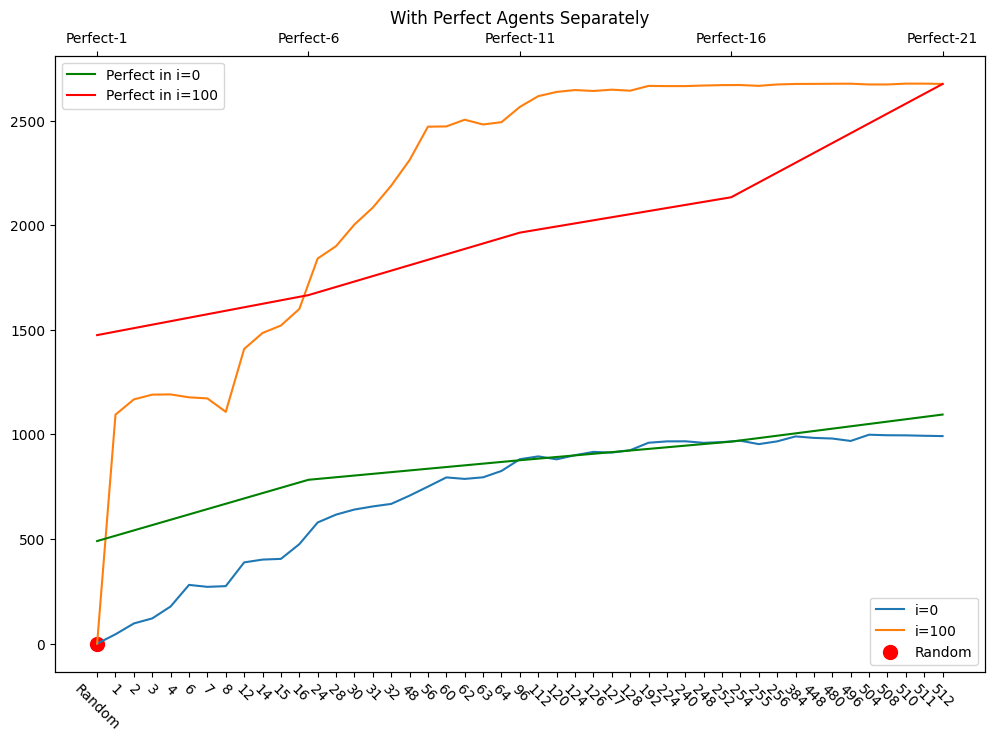

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ratings1 = {agent.gen if isinstance(agent, MCTSAgent) else str(agent): rating for agent, rating in sub_committee3.ratings.items() if not isinstance(agent, PerfectAgent)}
ratings2 = {agent.gen if isinstance(agent, MCTSAgent) else str(agent):rating for agent, rating in sub_committee4.ratings.items() if not isinstance(agent, PerfectAgent)}
ratings_perfect1 = {str(agent): rating for agent, rating in sub_committee3.ratings.items() if isinstance(agent, PerfectAgent)}
ratings_perfect2 = {str(agent): rating for agent, rating in sub_committee4.ratings.items() if isinstance(agent, PerfectAgent)}
ax1.plot(ratings1.keys(), ratings1.values(), label='i=0')
ax1.plot(ratings2.keys(), ratings2.values(), label='i=100')
ax1.set_xticklabels(ratings1.keys(), rotation=-45)
ax1.scatter(0, 0, color='red', s=100, label='Random')
ax1.legend(loc='lower right')
ax2 = ax1.twiny()
ax2.plot(ratings_perfect1.keys(), ratings_perfect1.values(), label='Perfect in i=0', color='green')
ax2.plot(ratings_perfect2.keys(), ratings_perfect2.values(), label='Perfect in i=100', color='red')
ax2.legend(loc='upper left')
plt.title('With Perfect Agents Separately')

In [9]:
ratings1.keys()

dict_keys(['Random', 1, 2, 3, 4, 6, 7, 8, 12, 14, 15, 16, 24, 28, 30, 31, 32, 48, 56, 60, 62, 63, 64, 96, 112, 120, 124, 126, 127, 128, 192, 224, 240, 248, 252, 254, 255, 256, 384, 448, 480, 496, 504, 508, 510, 511, 512])

Text(0.5, 1.0, 'With Perfect Agents Together')

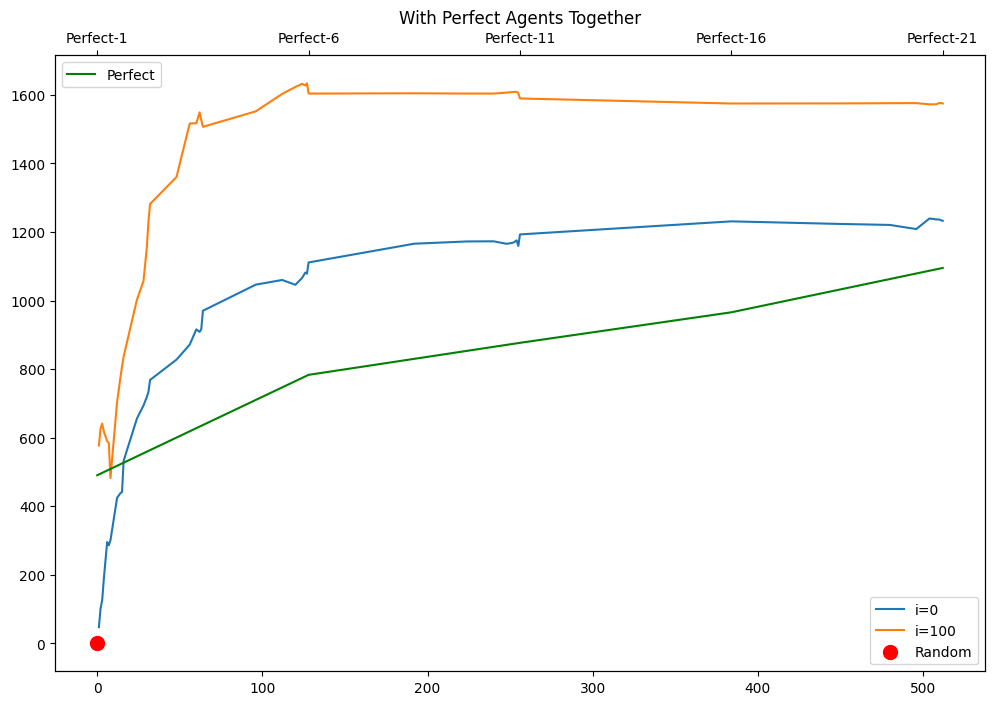

In [36]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ratings1 = {agent.gen: rating for agent, rating in committee.ratings.items() if isinstance(agent, MCTSAgent) and agent.n_iters==0}
ratings2 = {agent.gen: rating for agent, rating in committee.ratings.items() if isinstance(agent, MCTSAgent) and agent.n_iters==100}
ratings_perfect = {str(agent): rating for agent, rating in committee.ratings.items() if isinstance(agent, PerfectAgent)}
ax1.plot(ratings1.keys(), ratings1.values(), label='i=0')
ax1.plot(ratings2.keys(), ratings2.values(), label='i=100')
ax1.scatter(0, 0, color='red', s=100, label='Random')
ax1.legend(loc='lower right')
ax2 = ax1.twiny()
ax2.plot(ratings_perfect1.keys(), ratings_perfect1.values(), label='Perfect', color='green')
ax2.legend(loc='upper left')
plt.title('With Perfect Agents Together')

In [17]:
exclude_edges = []
for agent1, agent2, num_games in committee.G.edges(data='num_games'):
    ix1 = committee.G.nodes[agent1]['ix']
    ix2 = committee.G.nodes[agent2]['ix']
    win = committee.W_matrix[ix1, ix2]
    loss = committee.W_matrix[ix2, ix1]
    assert win + loss == num_games
    if (win/num_games) > 0.9 or (loss/num_games) > 0.90:
        # print(f'{agent1} vs {agent2}: {win} / {num_games}')
        exclude_edges.append((agent1, agent2))

In [18]:
sub_committee_exclude_overwhelming = committee.sub_committee(exclude_edges=exclude_edges)
sub_committee_exclude_overwhelming.compute_ratings()

Text(0.5, 1.0, 'Remove >90% win rate games')

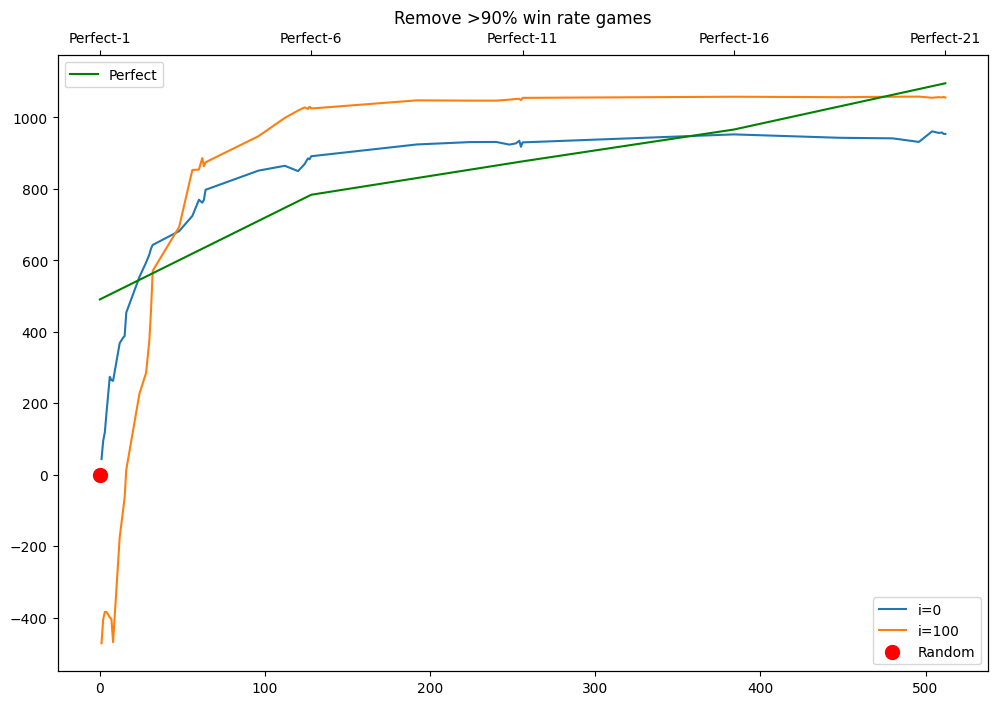

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ratings1 = {agent.gen: rating for agent, rating in sub_committee_exclude_overwhelming.ratings.items() if isinstance(agent, MCTSAgent) and agent.n_iters==0}
ratings2 = {agent.gen: rating for agent, rating in sub_committee_exclude_overwhelming.ratings.items() if isinstance(agent, MCTSAgent) and agent.n_iters==100}
ratings_perfect = {str(agent): rating for agent, rating in sub_committee_exclude_overwhelming.ratings.items() if isinstance(agent, PerfectAgent)}
ax1.plot(ratings1.keys(), ratings1.values(), label='i=0')
ax1.plot(ratings2.keys(), ratings2.values(), label='i=100')
ax1.scatter(0, 0, color='red', s=100, label='Random')
ax1.legend(loc='lower right')
ax2 = ax1.twiny()
ax2.plot(ratings_perfect1.keys(), ratings_perfect1.values(), label='Perfect', color='green')
ax2.legend(loc='upper left')
plt.title('Remove >90% win rate games')

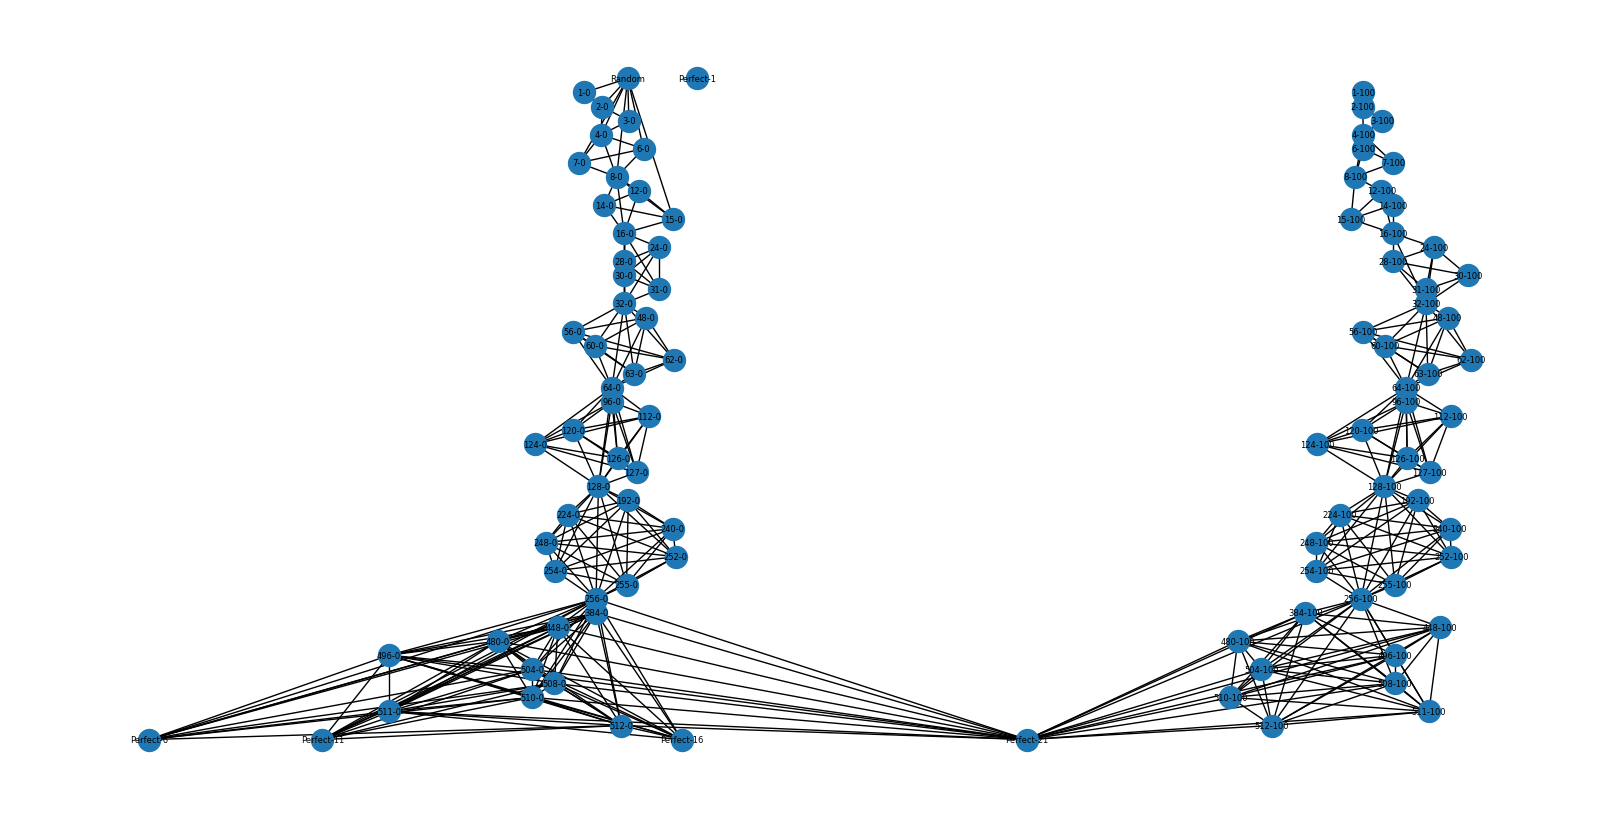

In [31]:
pos = graphviz_layout(sub_committee_exclude_overwhelming.G, prog="dot")
labels = {node: str(node) for node in sub_committee_exclude_overwhelming.G.nodes}
plt.figure(figsize=(16,8))
nx.draw(sub_committee_exclude_overwhelming.G, pos, with_labels=True, node_size=250, font_size=6)